In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Mean squared error from residual
def mse_from_e(residual):
    value = 0
    for i in residual:
        value += i[0] ** 2
    return value/len(residual)

# Mean Squared Error of X.w - y
def mean_squared_error(X, y, w):
    return np.mean((X @ w - y) ** 2)

In [18]:
# X = np.random.random((2, 3)) # n, d
# y = np.random.random((2, 1))
# w = np.random.random((3, 1))
# mean_squared_error(X, y, w)

In [19]:
# Generate a sawtooth weight vector
def genu(d, m):
    u = np.arange(d) * (2 * (np.arange(d) % 2) - 1)
    u = m * u / np.sqrt(np.dot(u, u))
    return u

# Generate random data
def genx(n, d):
    X = np.random.randint(0, 2, (n, d))
    X[:,int(d/2)] = 1
    return X

# Generate targets and add noise
def gent(X, u, noise):
    n = X.shape[0]
    y = np.dot(X, u).reshape(n, 1)
    y += noise * np.var(y) * np.random.randn(n, 1)
    return y

# Generate data, weights, and targets
def gimme_data_regres(n, d, noise=0.1):
    u = genu(d, 1.0).reshape(-1, 1)
    # print(u.shape)
    X = genx(n, d)
    # print(X.shape)
    y = gent(X, u, noise)
    mse_gen = mean_squared_error(X, y, u)
    print('Generator Loss={0:8.5f}\n'.format(mse_gen))
    return X, u, y

In [20]:
# gimme_data_regres(10, 3)

In [21]:
# Plot loss as a function of epoch
def loss_plotter(vlist, fname):
    vr = vlist[0]
    vn = vlist[1]
    if not use_notebook:
        plt.figure(fname)
        plt.plot(range(1, 1+len(vr)), vr,
            range(1, 1+len(vn)), vn,
            linewidth=2, linestyle='-', marker='o')
        plt.legend(('rep', 'nor'))
        plt.grid()
        xt = np.arange(1, 1 + max(len(vr), len(vn)))
        _ = plt.xticks(xt)
        _ = plt.xlabel('Epoch', fontsize=14)
        _ = plt.ylabel(fname, fontsize=14)
    if not use_notebook:
        plt.show(block=False)
    return

# Scatter plot of predicted vs. observed targets
def loss_scatter(X, y, w, fname):
    if not use_notebook:
        plt.figure(fname)
        plt.scatter(y, X.dot(w), edgecolors=(0,0,0))
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
        plt.grid()
        plt.xlabel('$y$', fontsize=14)
        plt.ylabel('$\hat{y}$', fontsize=14)
    if not use_notebook:
        plt.show(block=False)

In [22]:
# sample new index (w/ or w/o replacement)
def sample_new_index(d, replace=1):
    if replace:
        # sample_new_index.prm = np.random.permutation(d)
        ind = np.random.randint(d)
    else:
        if 'prm' not in sample_new_index.__dict__:  # If not generated then generate
            sample_new_index.prm = np.random.permutation(d)
            sample_new_index.head = 0
        ## ACT4
        ind = sample_new_index.prm[sample_new_index.head]
        sample_new_index.head += 1  # For wrap around after d generations
        assert ind < d
        
        if sample_new_index.head == d:
            sample_new_index.head = 0
            del sample_new_index.prm
    return ind

In [28]:
# calculate the change to w[j] wrt current margins z
# xjs is the squared norm of the jth column of X, a.k.a. ||xj||^2
def delta_wj(e, xj, xjs):
    assert e.shape == xj.shape
    return -(e.reshape(-1, 1).T @ xj.reshape(-1, 1)) / xjs

# Return new values for w[j] and residual
def update(wj, e, xj, xjs):
    a = delta_wj(e, xj, xjs)
    residual = e + a * xj
    wj_new = a + wj
    return wj_new, residual

In [24]:
# Initialize all variables using the zero vector for w
# (Initialize w as the zero vector)
# You should return w, xjs, residual
def initialize(X, y):
    n, d = X.shape
    w = np.zeros((d, 1))
    xjs = np.sum(X ** 2, axis = 0)
    return w, xjs, -y

In [25]:
# Check whether termination condition is met
def mse_check(mse_p, mse_c, eps):
    return (mse_p - mse_c) / mse_c < eps

In [29]:
# Linear regression using coordinate decent
def linear_regression_cd(X, y, epochs=100, eps=0.001, replace=1):
    w, xjs, residual = initialize(X, y)
    # print(mse_from_e(residual))
    mse_cd = [mse_from_e(residual)]
    # print(mse_cd)
    n, d = X.shape
    for e in range(d * epochs):
        j = sample_new_index(d, replace)
        xj = X[:,j].reshape(n, 1)
        w[j], residual = update(w[j], residual, xj, xjs[j])
        if (e + 1) % d == 0:
            mse_cd.append(mse_from_e(residual))
            # print(mse_cd)
            print('Epoch: {0:2d}  MSE: {1:5.3f}'.format(int((e+1)/d), mse_cd[-1]))
            assert int((e+1)/d) <= 100
            if mse_check(mse_cd[-2], mse_cd[-1], eps): break
    return w, mse_cd

Generator Loss= 0.05239

Epoch:  1  MSE: 0.150
Epoch:  2  MSE: 0.075
Epoch:  3  MSE: 0.065
Epoch:  4  MSE: 0.062
Epoch:  5  MSE: 0.054
Epoch:  6  MSE: 0.052
Epoch:  7  MSE: 0.052
Epoch:  8  MSE: 0.052
Epoch:  9  MSE: 0.052
Epoch: 10  MSE: 0.051
Epoch: 11  MSE: 0.051
Epoch: 12  MSE: 0.051
Epoch: 13  MSE: 0.051
Epoch: 14  MSE: 0.051
Epoch: 15  MSE: 0.051
Epoch: 16  MSE: 0.051
Epoch:  1  MSE: 0.107
Epoch:  2  MSE: 0.073
Epoch:  3  MSE: 0.058
Epoch:  4  MSE: 0.054
Epoch:  5  MSE: 0.053
Epoch:  6  MSE: 0.053
Epoch:  7  MSE: 0.053
Epoch:  8  MSE: 0.052
Epoch:  9  MSE: 0.052
Epoch: 10  MSE: 0.052
Epoch: 11  MSE: 0.052
Epoch: 12  MSE: 0.052
Epoch: 13  MSE: 0.052
Epoch: 14  MSE: 0.052
Epoch: 15  MSE: 0.052
Epoch: 16  MSE: 0.052
Epoch: 17  MSE: 0.052
Epoch: 18  MSE: 0.052
Epoch: 19  MSE: 0.052
Epoch: 20  MSE: 0.051
Epoch: 21  MSE: 0.051
Epoch: 22  MSE: 0.051
Epoch: 23  MSE: 0.051
Epoch: 24  MSE: 0.051
Epoch: 25  MSE: 0.051
Epoch: 26  MSE: 0.051
Epoch: 27  MSE: 0.051
Epoch: 28  MSE: 0.051
Epoch: 

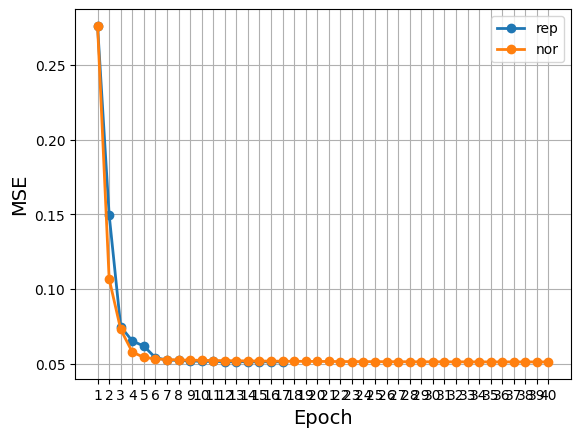

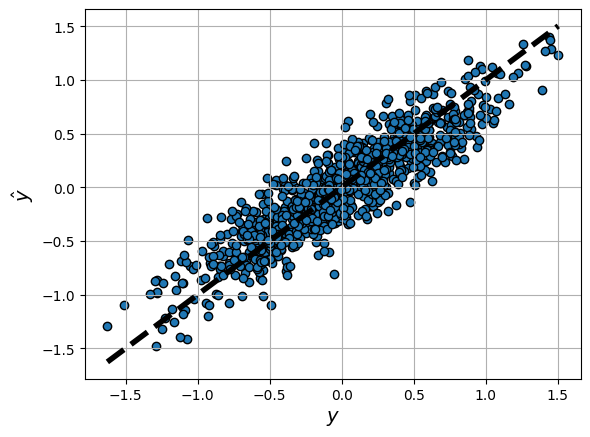

In [32]:
# ---------------- Main for linear regression using Coordinate Descent --------------
use_notebook = False
np.random.seed(19)
n, d, noise = 1000, 20, 1.0
myeps = 1e-4

[X, u, y] = gimme_data_regres(n, d, noise)

mse_list = []
[wr, mse_r] = linear_regression_cd(X, y, eps=myeps)
mse_list.append(mse_r)
[wn, mse_n] = linear_regression_cd(X, y, eps=myeps, replace=0)
mse_list.append(mse_n)

if not use_notebook:
    plt.close('all')
loss_plotter(mse_list, 'MSE')
loss_scatter(X, y, wn, 'True vs. Predicted Outcome')